In [1]:
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys
import time
import pdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split

# Clustering
from sklearn.datasets import make_biclusters, make_checkerboard, make_classification
from sklearn.datasets import samples_generator as sg
from sklearn.cluster.bicluster import SpectralCoclustering, SpectralBiclustering
from sklearn.metrics import consensus_score

# Corr
from scipy.stats import spearmanr, pearsonr
from numpy import corrcoef

# Utils
file_path = os.getcwd()  # os.path.dirname(os.path.relpath(__file__))
utils_path = os.path.abspath(os.path.join(file_path, '..', '..', 'utils_py'))
sys.path.append(utils_path)
import utils_all as utils

# Feature importance
pfi_path = os.path.abspath(os.path.join(file_path, '..', 'pfi'))
sys.path.append(pfi_path)
import pfi
import pfi_utils

import warnings
warnings.filterwarnings('ignore')

SEED=0

Using TensorFlow backend.


In [2]:
path = 'results_aacr_tc_cor1.0'

In [3]:
nns_fi = pd.read_csv(os.path.join(file_path, path, 'tc_nn_fi_score.csv'))
nnv_fi = pd.read_csv(os.path.join(file_path, path, 'tc_nn_fi_var.csv'))
rfs_fi = pd.read_csv(os.path.join(file_path, path, 'tc_rf_fi_score.csv'))
rfv_fi = pd.read_csv(os.path.join(file_path, path, 'tc_rf_fi_var.csv'))
rf_fi  = pd.read_csv(os.path.join(file_path, path, 'tc_rf_fi.csv'))

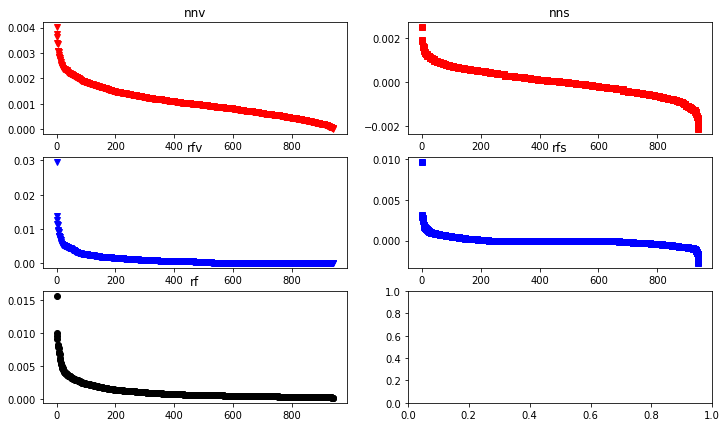

In [4]:
fig, ax = plt.subplots(3,2, figsize=(12,7))
ax[0,0].plot(nnv_fi['imp'], 'rv'); ax[0,0].set_title('nnv')
ax[0,1].plot(nns_fi['imp'], 'rs'); ax[0,1].set_title('nns')
ax[1,0].plot(rfv_fi['imp'], 'bv'); ax[1,0].set_title('rfv')
ax[1,1].plot(rfs_fi['imp'], 'bs'); ax[1,1].set_title('rfs')
ax[2,0].plot(rf_fi['imp'],  'ko'); ax[2,0].set_title('rf');

Text(0.5,1,'rfs')

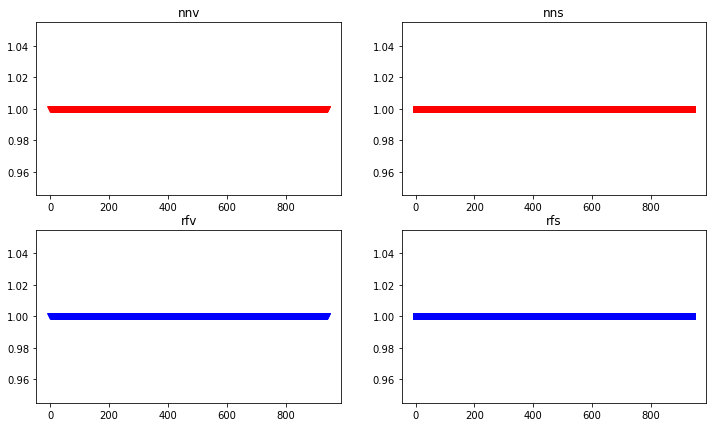

In [5]:
fig, ax = plt.subplots(2,2, figsize=(12,7))
ax[0,0].plot(nns_fi['n'], 'rv'); ax[0,0].set_title('nnv')
ax[0,1].plot(nns_fi['n'], 'rs'); ax[0,1].set_title('nns')
ax[1,0].plot(rfv_fi['n'], 'bv'); ax[1,0].set_title('rfv')
ax[1,1].plot(rfs_fi['n'], 'bs'); ax[1,1].set_title('rfs')

In [6]:
def top_cols(df, ncols=20):
    L = [c.split(',') for c in df.loc[:ncols-1, 'cols'].tolist()]
    s = []
    for i in L:
        s.extend(i)
    return set(s)

In [14]:
ncols=100
nns_top = top_cols(nns_fi, ncols=ncols)
nnv_top = top_cols(nnv_fi, ncols=ncols)
rfs_top = top_cols(rfs_fi, ncols=ncols)
rfv_top = top_cols(rfv_fi, ncols=ncols)
rf_top  = set(rf_fi.loc[:ncols-1, 'cols'].values)

In [15]:
print(len(nns_top))
print(len(nnv_top))
print(len(rfs_top))
print(len(rfv_top))

100
100
100
100


In [16]:
print('nns (-) nnv:', len(nns_top.intersection(nnv_top)))

nns (-) nnv: 17


In [17]:
print('rfs (-) rfv:', len(rfs_top.intersection(rfv_top)))

rfs (-) rfv: 35


In [18]:
print('nns (-) rfs:', len(nns_top.intersection(rfs_top)))

nns (-) rfs: 14


In [19]:
print('nnv (-) rfv:', len(nnv_top.intersection(rfv_top)))

nnv (-) rfv: 14


In [20]:
print('rf (-) rfs:', len(rf_top.intersection(rfs_top)))

rf (-) rfs: 40


In [21]:
print('rf (-) rfv:', len(rf_top.intersection(rfv_top)))

rf (-) rfv: 63
